In [4]:
import numpy as np
import matplotlib.pyplot as plt
from finite_volume.advection import AdvectionSolver


def l1(x: np.ndarray) -> float:
    return np.mean(np.abs(x))


def l2(x: np.ndarray) -> float:
    return np.sqrt(np.mean(np.square(x)))


def linf(x: np.ndarray) -> float:
    return np.max(np.abs(x))

In [5]:
p=2
quadrature='gauss-legendre'
limiter_config=dict()

In [6]:
def v_outer(x, y):
        return -y, x
    
def v_inner(x, y):
    return y, -x

shared_config = dict(
    **limiter_config,
    save=False,
    load=False,
    PAD=(0,1),
    NAD=1e-5,
    n=(128,),
    u0='disk',
    x=(-1,1),
    order=p + 1,
    flux_strategy=quadrature,
    courant=0.8,
    snapshot_dt=2*np.pi,
)

solver_inner = AdvectionSolver(**shared_config, v=v_inner)
solver_inner.rkorder()

solver_outer = AdvectionSolver(**shared_config, v=v_outer)
solver_outer.rkorder()

inner = solver_inner.u_snapshots[-1][1]
outer = np.fliplr(solver_outer.u_snapshots[-1][1])
diffs = inner - outer
print(f"{l1(diffs)=}")
print(f"{l2(diffs)=}")
print(f"{linf(diffs)=}")

New solution instance...


  0%|          | 0/6.283185307179586 [00:00]

100%|██████████| 6.283185307179586/6.283185307179586 [00:16]   



New solution instance...


100%|██████████| 6.283185307179586/6.283185307179586 [00:14]   


l1(diffs)=3.802796777709532e-17
l2(diffs)=1.6578440475536055e-16
linf(diffs)=2.6645352591003757e-15


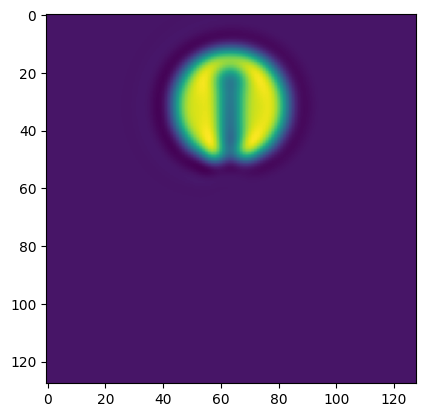

In [8]:
plt.imshow(np.flipud(outer))